# <center>Hate Speech Detection

### <p style='font-family:Comic Sans MS'><u>Importing necessary libraries</u></p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import re
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
from nltk import word_tokenize
from nltk.corpus import stopwords

### <p style='font-family:Comic Sans MS'><u>Loading the Twitter Dataset</u></p>

In [3]:
df = pd.read_csv("twitter.csv")
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


### <p style='font-family:Comic Sans MS'><u>Analysing the data</u></p>

In [4]:
df.shape

(24783, 7)

In [5]:
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

Unnamed: 0             int64
count                  int64
hate_speech            int64
offensive_language     int64
neither                int64
class                  int64
tweet                 object
dtype: object

In [8]:
df1 = df.copy()

### <p style='font-family:Comic Sans MS'><u>Making a column 'labels' that will be our target variable</u></p>

In [9]:
df1["labels"] = df["class"].map({0: "Hate Speech", 1: "Offensive Language", 2: "No Hate and Offensive"})
df1.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language


In [10]:
df1['labels'].value_counts()

Offensive Language       19190
No Hate and Offensive     4163
Hate Speech               1430
Name: labels, dtype: int64

### <p style='font-family:Comic Sans MS'><u>Getting a visual information of insight of a feature named 'labels'</u></p>

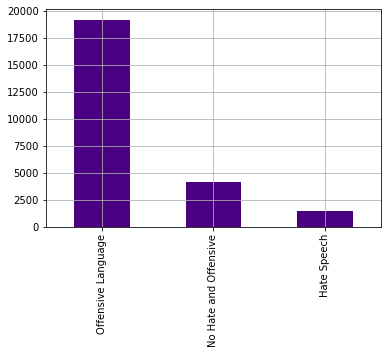

In [11]:
df1['labels'].value_counts().plot(kind='bar',color = 'indigo')
plt.grid()
plt.show()

### <p style = 'font-family:Comic Sans MS'>Seperating only usefull data.</p>

In [12]:
df1 = df1[["tweet", "labels"]]
df1.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language


### <p style='font-family:Comic Sans MS'><u>Creating Objects for stemmering and excluding stopwords.</u></p>

In [13]:
lm = WordNetLemmatizer()
sm = PorterStemmer()
ss = SnowballStemmer('english')
sw = stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### <p style='font-family:Comic Sans MS'><u>Defining a Function for Data Processing before Detection modeling</u></p>

In [14]:
import string

In [15]:
def df1Processing(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in sw]
    text=" ".join(text)
    text = [ss.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df1["tweet"] = df1["tweet"].apply(df1Processing)
df1.head()

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No Hate and Offensive
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language
3,rt cganderson vivabas look like tranni,Offensive Language
4,rt shenikarobert shit hear might true might f...,Offensive Language


### <p style='font-family:Comic Sans MS'><u>Splitting Data into independent and dependent (target) variable as x and y</u></p>

In [16]:
x = np.array(df1["tweet"])
y = np.array(df1["labels"])

### <p style='font-family:Comic Sans MS'><u>Splitting x and y into training and testing sets for Decision Tree Classifier</u></p>

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
cv = CountVectorizer()
x1 = cv.fit_transform(x)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.25, random_state=50)

In [19]:
from sklearn.tree import DecisionTreeClassifier

### <p style='font-family:Comic Sans MS'><u>Creating Decision Tree Classifier Model and Predicting</u></p>

In [20]:
m1 = DecisionTreeClassifier()
m1.fit(x1_train,y1_train)

user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = m1.predict(data)
print(output)

Enter a Text: Non-Believers should die.
['No Hate and Offensive']


In [21]:
print('Train Score ->',m1.score(x1_train,y1_train))
print('Test Score ->',m1.score(x1_test,y1_test))

Train Score -> 0.9994081885188573
Test Score -> 0.8770174306003874


### <p style='font-family:Comic Sans MS'><u>Making Predictions on Test Dataset and Building Confusion Matrix & Classification Report for m1</u></p>

In [22]:
ypred_m1 = m1.predict(x1_test)

In [23]:
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
def gen_metrics(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred))

In [25]:
from collections import Counter
c1 = Counter(y1_test)
print(c1)

Counter({'Offensive Language': 4814, 'No Hate and Offensive': 1015, 'Hate Speech': 367})


In [26]:
gen_metrics(y1_test,ypred_m1)

[[ 133   34  200]
 [  19  839  157]
 [ 200  152 4462]]
                       precision    recall  f1-score   support

          Hate Speech       0.38      0.36      0.37       367
No Hate and Offensive       0.82      0.83      0.82      1015
   Offensive Language       0.93      0.93      0.93      4814

             accuracy                           0.88      6196
            macro avg       0.71      0.71      0.71      6196
         weighted avg       0.88      0.88      0.88      6196




### <p style='font-family:Comic Sans MS'><u>Splitting x and y into training and testing sets for Multinomial Naive Bayes</u></p>

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
tfidf = TfidfVectorizer(max_features=800)
x2 = tfidf.fit_transform(x).toarray()
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.25, random_state=50)

### <p style='font-family:Comic Sans MS'><u>Creating Multinomial Naive Bayes Model and Predicting</u></p>

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
m2 = MultinomialNB()
m2.fit(x2_train,y2_train)
user = input("Enter a Text: ")
data = tfidf.transform([user]).toarray()
output = m2.predict(data)
print(output)

Enter a Text: Non-Believers should die.
['Offensive Language']


In [31]:
print('Train Score ->',m2.score(x2_train,y2_train))
print('Test Score ->',m2.score(x2_test,y2_test))

Train Score -> 0.8542529725076666
Test Score -> 0.8471594577146546


### <p style='font-family:Comic Sans MS'><u>Making Predictions on Test Dataset and Building Confusion Matrix & Classification Report for m2</u></p>

In [32]:
ypred_m2 = m2.predict(x2_test)

In [33]:
gen_metrics(y2_test,ypred_m2)

[[   4   14  349]
 [   1  469  545]
 [   1   37 4776]]
                       precision    recall  f1-score   support

          Hate Speech       0.67      0.01      0.02       367
No Hate and Offensive       0.90      0.46      0.61      1015
   Offensive Language       0.84      0.99      0.91      4814

             accuracy                           0.85      6196
            macro avg       0.80      0.49      0.51      6196
         weighted avg       0.84      0.85      0.81      6196



### <center><p style='font-family:Consolas'><u>Inference :- Decision Tree Classifier(DTC) has higher accuracy than Multinomial Naive Bayes(MNB) but here it seems that prediction has something else to tell.                              Some sentece were detected wrong in model 1(DTC) but detected correctly in model 2(MNB).                                Thus, We can safely assume that Multinomial Naive Bayes is better for Text Classification.</u></p>